# Keras Models

In the previous tutorial we built and trained a simple Neural Network from the ground up, through base tensorflow operations. This helped us understand how a Neural Network is trained in a lower level. Now, we'll do the same thing, through the [keras API](https://www.tensorflow.org/guide/keras), which has become the default way of creating models in TensorFlow 2.

In [2]:
!pip install --upgrade tensorflow
import tensorflow as tf
assert tf.__version__[0] == '2', 'this tutorial is for tensorflow versions of 2 or higher'

import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 421.8MB 31kB/s 
     |████████████████████████████████| 3.8MB 42.9MB/s 
     |████████████████████████████████| 450kB 46.2MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


First, we'll create the same dataset as we did in the previous tutorial.

Text(0.5, 1.0, 'Test set')

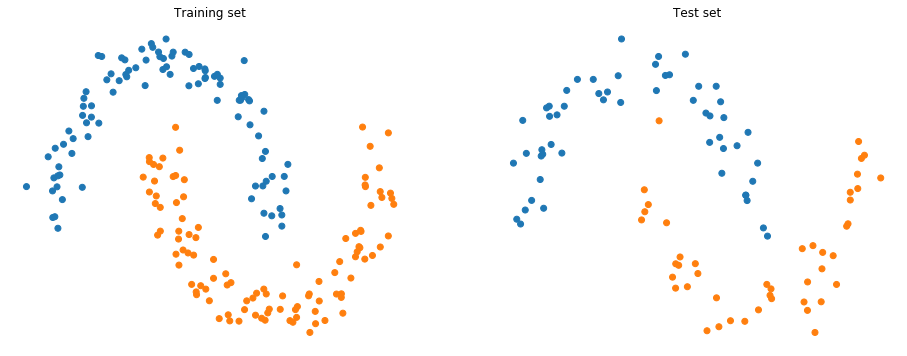

In [3]:
np.random.seed(13)

X, y = make_moons(300, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

######################################################################
############################## PLOTTING ##############################
######################################################################
plt.figure(figsize=(16, 6))

ax = plt.subplot(121)
colors = ['C' + str(i) for i in y_train]
ax.scatter(X_train[:, 0], X_train[:, 1], c=colors)
ax.axis('off')
ax.set_title('Training set')

ax = plt.subplot(122)
colors = ['C' + str(i) for i in y_test]
ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)
ax.axis('off')
ax.set_title('Test set')

Keras is essentially a high-level API to TensorFlow, intended for building and training Neural Networks. As quoted by the [official guide](https://www.tensorflow.org/guide/keras) it is:

>- *User-friendly*  
Keras has a simple, consistent interface optimized for common use cases. It provides clear and actionable feedback for user errors.
- *Modular and composable*  
Keras models are made by connecting configurable building blocks together, with few restrictions.
- *Easy to extend*  
Write custom building blocks to express new ideas for research. Create new layers, metrics, loss functions, and develop state-of-the-art models.

## Building a model

Let's start of by creating our model. Last time we had a Neural Network with $1$ hidden layer and $3$ neurons in that layer. To create a Fully-Connected Nerual Network, like the one we did last time, we need to use keras' [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers. Like last time, the size of the hidden layer is up to us, but the output layer needs to have only $1$ neuron. Both dense layers will have a sigmoid activation function.

One thing we need to explicitly tell keras, when building the model, is the shape our input will have. It doens't care about how many samples we have, rather how many **features** the input has. In our case, we have $2$ input features so we'll define an input shape of `(2,)`. 



In [0]:
tf.random.set_seed(6)

# Input layer: this has no trainable parameters, but helps keras know the
# shape of the input it will be expecting.
inp = tf.keras.layers.Input(shape=(2,)) 

# Hidden layer: will be a Dense layer with 3 neurons and a sigmoid activation.
# the final parameter is to show that it's connected after layer 'inp', i.e.
# its input is layer 'inp's output.
hid = tf.keras.layers.Dense(3, activation='sigmoid')(inp)

# Hidden layer: will be again a Dense layer with 1 neurons and a sigmoid 
# activation. This layer is connected after layer 'hid', i.e. its input is layer
# 'hid's output.
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid)

# Define a keras model whose input is layer 'inp' and output is layer 'out'
mlp = tf.keras.models.Model(inp, out)

Keras represents the Neural Network as an object it calls a model. The model has many functions, like `.fit()`, `.predict()`, etc., through which we can use it.

A couple of things to note here:

1. We could have omitted the `Input` layer by adding the parameter `input_shape` to the first `Dense` layer. I prefer to use `Input` layers, though.

2. This is Keras' [**Functional API**](https://www.tensorflow.org/guide/keras/functional). Keras also has an arguably more user-friendly API called [Sequential](https://keras.io/getting-started/sequential-model-guide/). This however is much **more limited** than the functional and so we won't be using it. If we were, our models would look like this:
```python
mlp = tf.keras.models.Sequential([  # define sequential model and add individual
      tf.keras.layers.Input(shape=(2,))  # layers as lists
      tf.keras.layers.Dense(3, activation='sigmoid')
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])
# or equivalently
mlp = tf.keras.models.Sequential()  # define an empty Sequential model
mlp.add(tf.keras.layers.Input(shape=(2,)))  # add layers one by one
mlp.add(tf.keras.layers.Dense(3, activation='sigmoid'))
mlp.add(tf.keras.layers.Dense(1, activation='sigmoid'))
```  

3. Most people import each object separately when using Keras. This is also Keras' [official recommendataion](https://keras.io/#getting-started-30-seconds-to-keras). This would look like this:
```python
from tf.keras.layers import Input, Dense
from tf.keras.models import Model
inp = Input(shape=(2,))
hid = Dense(3, activation='sigmoid')(inp)
out = Dense(1, activation='sigmoid')(hid)
mlp = Model(inp, out)
```
I prefer not to go back and forth when forgetting to import a layer, so I call everything from `tf`. Another option is how [TensorFlow docs](https://www.tensorflow.org/guide/keras/functional) recommend it:
```python
from tesorflow import keras  # I don't recommend this because it might be
                                # be confused with the original keras package:
                                # https://keras.io/
from tesorflow.keras import layers  # This isn't a bad idea though
inp = layers.Input(shape=(2,))
hid = layers.Dense(3, activation='sigmoid')(inp)
out = layers.Dense(1, activation='sigmoid')(hid)
mlp = keras.Model(inp, out)
```

We can inspect the model's architecture through it's built in `.summary()` method.

In [5]:
mlp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

We can see our Neural Network has $13$ total parameters ($9$ in the hidden layer and $4$ in the output).

Next, we need to compile the model. Here we assign an optimizer to train the model and designate the loss function. Optionally we can also define a set of metrics to evaluate our model on.

In [0]:
mlp.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

All $3$ components we used are provided by the base keras package. We'll learn how to create our own in future tutorials. For the time being we'll stick with the built-in ones. 

## Training the model

The loss is the Mean-Squared Error we used in the previous tutorial. The only metric we used is accuracy, which we also used previously (Note that metrics need to be given in a list even if it's just one). Finally, the optimizer `sgd` stands for **Stochastic Gradient Descent** and it's the closest thing to the Gradient Descent optimizer we saw previously. We'll talk more about optimizers in our "optimizers" tutorial.

Now all that remains is to train the model. This can be done in just 1 line in keras!

In [7]:
mlp.fit(X_train, y_train, epochs=20)

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 1ms/sample - loss: 0.2299 - accuracy: 0.5274
Epoch 2/20
201/201 [==============================] - 0s 82us/sample - loss: 0.2298 - accuracy: 0.5274
Epoch 3/20
201/201 [==============================] - 0s 94us/sample - loss: 0.2297 - accuracy: 0.5274
Epoch 4/20
201/201 [==============================] - 0s 81us/sample - loss: 0.2296 - accuracy: 0.5323
Epoch 5/20
201/201 [==============================] - 0s 73us/sample - loss: 0.2294 - accuracy: 0.5323
Epoch 6/20
201/201 [==============================] - 0s 76us/sample - loss: 0.2293 - accuracy: 0.5323
Epoch 7/20
201/201 [==============================] - 0s 86us/sample - loss: 0.2292 - accuracy: 0.5373
Epoch 8/20
201/201 [==============================] - 0s 89us/sample - loss: 0.2291 - accuracy: 0.5373
Epoch 9/20
201/201 [==============================] - 0s 77us/sample - loss: 0.2289 - accuracy: 0.5423
Epoch 10/20
201/201 [==============================] 

The slow training can be attributed to a small learning rate. If we want to increase it we have to instantiate our own [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) object.

In [8]:
# Instantiate our own SGD optimizer and set the desired learning rate
sgd = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model again
mlp.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# Train the model (it will resume from where it stopped previously)
mlp.fit(X_train, y_train, epochs=20)

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 1ms/sample - loss: 0.2271 - accuracy: 0.6368
Epoch 2/20
201/201 [==============================] - 0s 95us/sample - loss: 0.2260 - accuracy: 0.6667
Epoch 3/20
201/201 [==============================] - 0s 73us/sample - loss: 0.2246 - accuracy: 0.7015
Epoch 4/20
201/201 [==============================] - 0s 97us/sample - loss: 0.2234 - accuracy: 0.7264
Epoch 5/20
201/201 [==============================] - 0s 75us/sample - loss: 0.2220 - accuracy: 0.7363
Epoch 6/20
201/201 [==============================] - 0s 80us/sample - loss: 0.2209 - accuracy: 0.7413
Epoch 7/20
201/201 [==============================] - 0s 93us/sample - loss: 0.2195 - accuracy: 0.7612
Epoch 8/20
201/201 [==============================] - 0s 87us/sample - loss: 0.2182 - accuracy: 0.7761
Epoch 9/20
201/201 [==============================] - 0s 68us/sample - loss: 0.2167 - accuracy: 0.7910
Epoch 10/20
201/201 [==============================] 

The model seems to fluctuare around $80\%$ training accuarcy. We won't know how good it is, though, until we evaluate it on the test set. 

## Evaluating the model

We can do this with two ways. Either generate the predictions on the test set and evaluate them on our own metric (like we did before) or use keras' `.evaluate()` method. This evaluates the model on whatever loss/metrics we chose when compiling the model.

In [9]:
# 1. Manually evaluate the model
def accuracy(y_true, y_pred):
  bin_preds = (y_pred > 0.5).numpy().astype(int).flatten()
  return np.sum(y_true == bin_preds) / len(y_true) 

y_hat = mlp(X_test, y_test)
print('1a. Test set accuracy: {:.2f}%'.format(accuracy(y_test, y_hat)*100))

# 2. Use keras to evaluate the model
test_loss, test_acc = mlp.evaluate(X_test, y_test, verbose=0)  # to suppress output
print('2. Test set accuracy: {:.2f}%'.format(test_acc*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1a. Test set accuracy: 78.79%
2. Test set accuracy: 78.79%


A note on generating predictions: the default way to do this is through `model.predict(x)`, however I've found this to be buggy in TF2. A compiled model object is callable, though, and that seems to work fine like that (i.e. `model(x)`). This works if `x` is a tensor, because in other contexts calling a model has entirely different effects!

## Customizing a model

Now let's see see how we can we can customize our model. We should note at this point that these won't necessarily improve the performance of the model; we aim at just showing some of the options we have when dealing with keras models.

### Number and size of layers

The first thing worth playing around with is the number and size of the layers in the Neural Network.

In [11]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='sigmoid')(inp)  # add an extra hidden
                                                             # layer with 10 parameters
hid2 = tf.keras.layers.Dense(3, activation='sigmoid')(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)

model = tf.keras.models.Model(inp, out)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 877us/sample - loss: 0.2622 - accuracy: 0.1393
Epoch 2/20
201/201 [==============================] - 0s 89us/sample - loss: 0.2615 - accuracy: 0.1592
Epoch 3/20
201/201 [==============================] - 0s 95us/sample - loss: 0.2608 - accuracy: 0.1542
Epoch 4/20
201/201 [==============================] - 0s 96us/sample - loss: 0.2603 - accuracy: 0.1642
Epoch 5/20
201/201 [==============================] - 0s 113us/sample - loss: 0.2596 - accuracy: 0.1940
Epoch 6/20
201/201 [==============================] - 0s 96us/sample - loss: 0.2594 - accuracy: 0.2289
Epoch 7/20
201/201 [==============================] - 0s 92us/sample - loss: 0.2587 - accuracy: 0.3184
Epoch 8/20
201/201 [==============================] - 0s 83us/sample - loss: 0.2584 - accuracy: 0.2985
Epoch 9/20
201/201 [==============================] - 0s 97us/sample - loss: 0.2578 - accuracy: 0.2488
Epoch 10/20
201/201 [=============================

Keep in mind that adding more layers and consequently more parameters means you have a harder time training your network!

### Activation functions

Dispite us using the sigmoid function throughout this tutorial, the most popular activation function is the [Rectified Linear Unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)). Other popular options are [tanh](http://mathworld.wolfram.com/HyperbolicTangent.html), [elu](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#elu) and [softmax](https://en.wikipedia.org/wiki/Softmax_function). The last is used when classifying more than $2$ classes. A full list of available activation functions can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/activations). We'll see how to write our own in a future tutorial.

The default option of a layer is not having an activation function at all, or `activation='linear'` as keras calls it. 

In [12]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='relu')(inp)
hid2 = tf.keras.layers.Dense(3, activation='relu')(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)

model = tf.keras.models.Model(inp, out)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 891us/sample - loss: 0.2682 - accuracy: 0.4577
Epoch 2/20
201/201 [==============================] - 0s 83us/sample - loss: 0.2610 - accuracy: 0.5174
Epoch 3/20
201/201 [==============================] - 0s 83us/sample - loss: 0.2543 - accuracy: 0.5274
Epoch 4/20
201/201 [==============================] - 0s 77us/sample - loss: 0.2480 - accuracy: 0.6020
Epoch 5/20
201/201 [==============================] - 0s 73us/sample - loss: 0.2427 - accuracy: 0.6418
Epoch 6/20
201/201 [==============================] - 0s 104us/sample - loss: 0.2381 - accuracy: 0.5970
Epoch 7/20
201/201 [==============================] - 0s 84us/sample - loss: 0.2337 - accuracy: 0.6617
Epoch 8/20
201/201 [==============================] - 0s 80us/sample - loss: 0.2293 - accuracy: 0.7065
Epoch 9/20
201/201 [==============================] - 0s 76us/sample - loss: 0.2253 - accuracy: 0.7214
Epoch 10/20
201/201 [=============================

### Initializers

An initializer essentialy is a distribution from which we keras will draw the initial values for the model's parameters. Strangely enough, using a good initializer is more important than it seems! A list of all available initializers can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/initializers).

When initializing a layer's parameters, we **don't** want our weights to start with a value of $0$, however we usually start our biases as zeros. That being said the default initializer is pretty good so we don't usually change it!

Initializers are applied **for each layer individually** and separately for weights and biases.

In [13]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='relu',
                             kernel_initializer='he_normal',  # weight initializer
                             bias_initializer='zeros'         # bias initializer
                             # 'zeros' is actually the default value so this 
                             # line is redundant
                             )(inp)
hid2 = tf.keras.layers.Dense(3, activation='relu',
                             kernel_initializer='he_normal',
                             )(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)

model = tf.keras.models.Model(inp, out)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 860us/sample - loss: 0.2688 - accuracy: 0.4030
Epoch 2/20
201/201 [==============================] - 0s 92us/sample - loss: 0.2620 - accuracy: 0.5224
Epoch 3/20
201/201 [==============================] - 0s 107us/sample - loss: 0.2566 - accuracy: 0.5224
Epoch 4/20
201/201 [==============================] - 0s 104us/sample - loss: 0.2531 - accuracy: 0.5224
Epoch 5/20
201/201 [==============================] - 0s 74us/sample - loss: 0.2506 - accuracy: 0.5224
Epoch 6/20
201/201 [==============================] - 0s 87us/sample - loss: 0.2482 - accuracy: 0.5224
Epoch 7/20
201/201 [==============================] - 0s 74us/sample - loss: 0.2449 - accuracy: 0.5224
Epoch 8/20
201/201 [==============================] - 0s 87us/sample - loss: 0.2407 - accuracy: 0.5224
Epoch 9/20
201/201 [==============================] - 0s 85us/sample - loss: 0.2346 - accuracy: 0.5224
Epoch 10/20
201/201 [============================

### Removing biases

Modern Neural Network architectures sometimes remove the biases altogether!

In [14]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='relu',
                             kernel_initializer='he_normal',  # weight initializer
                             use_bias=False,  # don't have biases at all
                             )(inp)
hid2 = tf.keras.layers.Dense(3, activation='relu',
                             kernel_initializer='he_normal',
                             use_bias=False,
                             )(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)

model = tf.keras.models.Model(inp, out)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 739us/sample - loss: 0.2254 - accuracy: 0.6219
Epoch 2/20
201/201 [==============================] - 0s 82us/sample - loss: 0.2124 - accuracy: 0.6169
Epoch 3/20
201/201 [==============================] - 0s 86us/sample - loss: 0.2008 - accuracy: 0.6219
Epoch 4/20
201/201 [==============================] - 0s 82us/sample - loss: 0.1906 - accuracy: 0.6517
Epoch 5/20
201/201 [==============================] - 0s 75us/sample - loss: 0.1817 - accuracy: 0.6766
Epoch 6/20
201/201 [==============================] - 0s 76us/sample - loss: 0.1741 - accuracy: 0.7114
Epoch 7/20
201/201 [==============================] - 0s 71us/sample - loss: 0.1667 - accuracy: 0.7363
Epoch 8/20
201/201 [==============================] - 0s 67us/sample - loss: 0.1601 - accuracy: 0.7711
Epoch 9/20
201/201 [==============================] - 0s 79us/sample - loss: 0.1538 - accuracy: 0.8109
Epoch 10/20
201/201 [==============================

### Regularization through norm penalties

A common regularization technique in Machine Learning (though not so popular in Deep Learning) are **parameter norm penalties**. The intuition behind this is that we want to keep the values of our parameters small, so that our model doesn't overfit. So we add a term to the loss function proportional to the norm of the parameters. The optimizer, wanting to minimize the loss, will on one hand try to reduce the classification loss, but on the other hand it will try to reduce the parameter norms, thus leadnig to smaller parameters.

Depending on which norm we want to use (the first or the second), there are two typers of regularizers:

- [L1 regularizer](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l1) (penalty proportional to the first norm).
- [L2 regularizer](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l2) (penalty proportional to the second norm).
- [L1-L2 regularizer](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l1_l2) (penalty based on both norms).

We can apply the regularization to the weights (`kernel_regularizer`), the biases (`bias_regularizer`) or the activations (`activity_regularizer`). Regularizers are applied to each layer individually.

In [15]:
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='relu',
                             kernel_initializer='he_normal',
                             kernel_regularizer='l2',  # L2 penalty to the weights
                             bias_regularizer='l1',    # L1 penalty to the biases
                             )(inp)
hid2 = tf.keras.layers.Dense(3, activation='relu',
                             kernel_initializer='he_normal',
                             kernel_regularizer='l2',
                             bias_regularizer='l1', 
                             )(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)

model = tf.keras.models.Model(inp, out)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 1ms/sample - loss: 0.6799 - accuracy: 0.3682
Epoch 2/20
201/201 [==============================] - 0s 87us/sample - loss: 0.6105 - accuracy: 0.3881
Epoch 3/20
201/201 [==============================] - 0s 82us/sample - loss: 0.5910 - accuracy: 0.4179
Epoch 4/20
201/201 [==============================] - 0s 72us/sample - loss: 0.5761 - accuracy: 0.5075
Epoch 5/20
201/201 [==============================] - 0s 85us/sample - loss: 0.5629 - accuracy: 0.5871
Epoch 6/20
201/201 [==============================] - 0s 108us/sample - loss: 0.5510 - accuracy: 0.6667
Epoch 7/20
201/201 [==============================] - 0s 86us/sample - loss: 0.5393 - accuracy: 0.7313
Epoch 8/20
201/201 [==============================] - 0s 81us/sample - loss: 0.5274 - accuracy: 0.7662
Epoch 9/20
201/201 [==============================] - 0s 82us/sample - loss: 0.5153 - accuracy: 0.7960
Epoch 10/20
201/201 [==============================]

### Optimizer

One of the most important things to choose when training a Neural Network is the proper optimizer. The most simple optimizer available is SGD, which partitions the training data into **batches** and performs a step of Gradient Descent on each batch individually. This optimizer's functionality can be augmented through a term called [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum).

There are other more advanced optimizers that converge faster and more reliably than SGD like [AdaGrad](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad), [RMSProp](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp), or the most popular [Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam).

An excellent overview of the different optimizers can be found [here](https://ruder.io/optimizing-gradient-descent/).

In [17]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)
print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 2ms/sample - loss: 0.3704 - accuracy: 0.8408
Epoch 2/20
201/201 [==============================] - 0s 92us/sample - loss: 0.3344 - accuracy: 0.8458
Epoch 3/20
201/201 [==============================] - 0s 89us/sample - loss: 0.3051 - accuracy: 0.8458
Epoch 4/20
201/201 [==============================] - 0s 83us/sample - loss: 0.2806 - accuracy: 0.8507
Epoch 5/20
201/201 [==============================] - 0s 80us/sample - loss: 0.2603 - accuracy: 0.8507
Epoch 6/20
201/201 [==============================] - 0s 91us/sample - loss: 0.2432 - accuracy: 0.8557
Epoch 7/20
201/201 [==============================] - 0s 85us/sample - loss: 0.2271 - accuracy: 0.8557
Epoch 8/20
201/201 [==============================] - 0s 88us/sample - loss: 0.2127 - accuracy: 0.8557
Epoch 9/20
201/201 [==============================] - 0s 84us/sample - loss: 0.2001 - accuracy: 0.8607
Epoch 10/20
201/201 [==============================] 

### Loss Function

The choice of the loss function is actually not up to us most of the times; rather it's defined by the task we have to solve. Usually we choose the most popular loss for the desired task.

Up till now, we've been using a MSE loss to train our classifiers. This is not the best choice, however. For classification, the most popular loss function is [**cross-entropy**](https://en.wikipedia.org/wiki/Cross_entropy):

$$
loss(y, \hat y) = - \sum_{i=1}^N y_i \cdot \log \hat y_i
$$

An excellent post providing an introduction to cross-entropy can be found [here](http://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/).

Regarding keras, there are two cross-entropies:

- `binary_crossentropy`, which should be used for binary classification
- `categorical_crossentropy`, which should be used for multiclass classification

Mean Squared Error should be used as a loss for regression tasks. Let's fix this. 

In [18]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20,)
print('Test set accuracy: {:.2f}%'.format(model.evaluate(X_test, y_test, verbose=0)[1]))

Train on 201 samples
Epoch 1/20
201/201 [==============================] - 0s 1ms/sample - loss: 0.3750 - accuracy: 0.8607
Epoch 2/20
201/201 [==============================] - 0s 92us/sample - loss: 0.3697 - accuracy: 0.8607
Epoch 3/20
201/201 [==============================] - 0s 81us/sample - loss: 0.3566 - accuracy: 0.8657
Epoch 4/20
201/201 [==============================] - 0s 71us/sample - loss: 0.3509 - accuracy: 0.8657
Epoch 5/20
201/201 [==============================] - 0s 91us/sample - loss: 0.3411 - accuracy: 0.8806
Epoch 6/20
201/201 [==============================] - 0s 83us/sample - loss: 0.3401 - accuracy: 0.8806
Epoch 7/20
201/201 [==============================] - 0s 84us/sample - loss: 0.3334 - accuracy: 0.8756
Epoch 8/20
201/201 [==============================] - 0s 82us/sample - loss: 0.3279 - accuracy: 0.8856
Epoch 9/20
201/201 [==============================] - 0s 83us/sample - loss: 0.3227 - accuracy: 0.8756
Epoch 10/20
201/201 [==============================] 

Let's borrow a plot from the previous tutorial and see how our model actually classifies.

Text(0.5, 1.0, 'Test set samples and predictions')

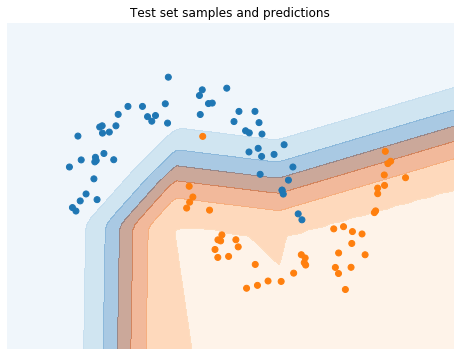

In [19]:
######################################################################
############################## PLOTTING ##############################
######################################################################

# Find out where to start and end the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Generate the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05, dtype=np.float32),
                     np.arange(y_min, y_max, 0.05, dtype=np.float32))

# Generate predictions for each point of the mesh
mesh_preds = model(np.c_[xx.ravel(), yy.ravel()]).numpy()

# We'll also create a custom diverging colormap from blue to orange. 
# Details here:
# https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html 

blue = matplotlib.cm.get_cmap('Blues', 128)
orange = matplotlib.cm.get_cmap('Oranges_r', 128)

color_array = np.vstack((blue(np.linspace(0, 1, 128)),
                         orange(np.linspace(0, 1, 128))))

BuOr = matplotlib.colors.ListedColormap(color_array)

# Create the figure
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

# Draw the mesh predictions as contours
ax.contourf(xx, yy, mesh_preds.reshape(xx.shape), cmap=BuOr, alpha=0.4)

# Draw the data points in their actual colors
colors = ['C' + str(int(i)) for i in y_test]
ax.scatter(X_test[:, 0], X_test[:, 1], c=colors)

ax.axis('off')
ax.set_title('Test set samples and predictions')

The above figure has a much better appearance than the previous plots, which is the reason for the higher accuracy.

## Exporting and Importing a keras model

A model has two components: its architecture and its parameters. The first is what we defined when building the model, while the second is the values that the model's parameters took during training. All of the *knowledge* the model accumulated during training, is stored in these parameters!

Let's see an example:

In [21]:
# 1. Build a new model with the same architecture as the previous
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='relu',)(inp)
hid2 = tf.keras.layers.Dense(3, activation='relu')(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)
model2 = tf.keras.models.Model(inp, out)
model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 2. Evaluate its performance
print('Test set accuracy: {:.2f}%'.format(model2.evaluate(X_test, y_test, verbose=0)[1]))

# 3. Transfer the weights from the trained model
weights = model.get_weights()  # retrieve the weights as a list of arrays
model2.set_weights(weights)   # transfer the weights to the new model

# 4. Re-evaluate its performance
print('Test set accuracy: {:.2f}%'.format(model2.evaluate(X_test, y_test, verbose=0)[1]))

Test set accuracy: 0.55%
Test set accuracy: 0.93%


The model was randomly predicting when it was first initializer, but predicts accurately once trained.

This means that by storing the model's weights, we are storing all the necessary information we need to replicate the model's performance.

Let's run the same example but save the weights to the disk this time.

In [23]:
# 1. Build a new model with the same architecture as the previous
inp = tf.keras.layers.Input(shape=(2,)) 
hid1 = tf.keras.layers.Dense(10, activation='relu',)(inp)
hid2 = tf.keras.layers.Dense(3, activation='relu')(hid1)
out = tf.keras.layers.Dense(1, activation='sigmoid')(hid2)
model2 = tf.keras.models.Model(inp, out)
model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# 2. Evaluate its performance
print('Test set accuracy: {:.2f}%'.format(model2.evaluate(X_test, y_test, verbose=0)[1]))

# 3. Transfer the weights from the trained model
model.save_weights('test_weights.h5')  # save the model's weights on disk
model2.load_weights('test_weights.h5')  # load the weights from the disk

# 4. Re-evaluate its performance
print('Test set accuracy: {:.2f}%'.format(model2.evaluate(X_test, y_test, verbose=0)[1]))

Test set accuracy: 0.23%
Test set accuracy: 0.93%


This carries the downside that we need to remember the model's architecture. If this is not desirable, we can store the whole model (architecture + weights) to the disk. 

In [24]:
# 1. Save the trained model 
model.save('full_model.h5')

# 2. Load the saved model as a new model
model2 = tf.keras.models.load_model('full_model.h5')

# 3. Evaluate its performance
print('Test set accuracy: {:.2f}%'.format(model2.evaluate(X_test, y_test, verbose=0)[1]))

Test set accuracy: 0.93%


Our dive into keras is not complete. In the next tutorial build a Convolutional Neural Networks for image classification and we'll discuss concepts like batches and callbacks.